In [24]:
import unittest
import os
import io
from inverter_simulator.simulator import InverterSimulator
from aemo_to_tariff import spot_to_tariff
import json
from zoneinfo import ZoneInfo
import requests
import pandas as pd
from datetime import datetime, timedelta
from requests.models import PreparedRequest


In [30]:

API_KEY = os.getenv('POWSTON_API_KEY')

powston_test_server = os.getenv("POWSTON_TEST_SERVER", 'https://dev.inverterintelligence.com')
header = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}
site_id = 90

url = f'{powston_test_server}/api/meter_data/{site_id}'
params = {
    "from_date": "2025-01-19",
    "to_date": "2025-01-20"}
req = PreparedRequest()
req.prepare_url(url, params)

response = requests.get(req.url, headers=header).json()

meter_data_df = pd.read_json(response, orient="records", convert_dates=['interval_time'])
meter_data_df['interval_time'] = pd.to_datetime(meter_data_df['interval_time']).dt.tz_convert(ZoneInfo("Australia/Brisbane"))
meter_data_df.set_index('interval_time', inplace=True)
meter_data_df.sort_index(inplace=True)
# remove duplcates and keep the last value
meter_data_df = meter_data_df[~meter_data_df.index.duplicated(keep='last')]
meter_data_df

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

,energy_import,energy_export,battery_w,rrp,hhf_rrp,forecasts,solar_power,house_power,billed_costs,billed_earnings,buy_price,sell_price
interval_time,,,,,,,,,,,,
2025-01-14 23:00:00+10:00,0.001500,0.001333,NaN,115.41,115.41,"[87.5, 88.81, 87.5, 87.5, 97.59, 97.45, 102.23...",NaN,NaN,0.579941,0.016376,21.712305,11.541
2025-01-14 23:05:00+10:00,0.003500,0.003167,NaN,120.80,120.80,"[87.5, 88.81, 87.5, 87.5, 97.59, 97.45, 102.23...",NaN,NaN,0.635345,0.040709,22.314335,12.080
2025-01-14 23:10:00+10:00,0.003500,0.003167,NaN,114.62,114.62,"[114.67, 107.56, 88.81, 87.5, 88.81, 88.81, 93...",NaN,NaN,0.632813,0.038627,21.624066,11.462
2025-01-14 23:15:00+10:00,0.003500,0.003167,NaN,110.12,110.12,"[114.67, 107.56, 88.81, 87.5, 88.81, 88.81, 93...",NaN,NaN,0.630970,0.037110,21.121443,11.012
2025-01-14 23:20:00+10:00,0.003500,0.003167,NaN,96.23,96.23,"[114.67, 107.56, 88.81, 87.5, 88.81, 88.81, 93...",NaN,NaN,0.625279,0.032429,19.570014,9.623
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-18 06:55:00+10:00,0.001167,0.001167,-933.285714,-30.87,-30.87,"[-25.85, -32.01, -33.35, -33.03, -36.72, -35.6...",1617.129,2613.8,0.551097,-0.003833,5.373706,-3.087
2025-01-18 07:00:00+10:00,0.001167,0.001167,-1021.000000,-32.01,-32.01,"[-32.01, -33.35, -33.03, -36.72, -35.66, -39.8...",1773.872,1700.6,0.550941,-0.003974,5.246375,-3.201
2025-01-18 07:05:00+10:00,0.001333,0.001000,68.166667,-32.62,-32.62,"[-32.01, -33.35, -33.03, -36.72, -35.66, -39.8...",1865.000,1516.2,0.552403,-0.003471,5.178242,-3.262


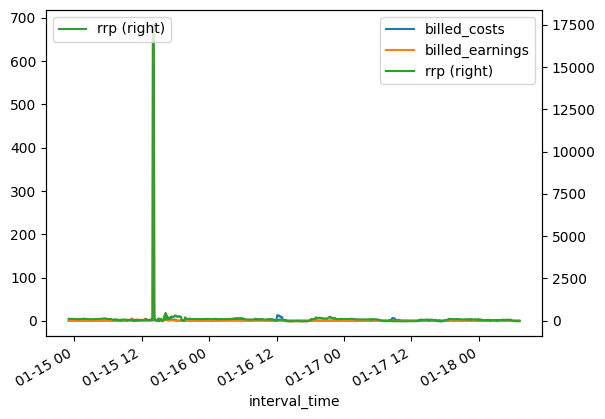

In [26]:
plt = meter_data_df[['billed_costs', 'billed_earnings']].plot(legend=True)
plt.legend(loc='upper left')
plt = meter_data_df['rrp'].plot(secondary_y=True, ax=plt, legend=True)
plt.legend(loc='upper left')
meter_data_df

In [27]:
from matplotlib import pyplot as plt

def plot():
    ret_df['cost'] = ret_df['sim_cost']
    title = 'Simulation run'
    max_zoomed_rrp = 500

    if 'house_power' in ret_df.columns:
        ret_df['house_consumption'] = ret_df['house_power']
    if 'battery_power' in ret_df.columns:
        ret_df['pbattery1'] = ret_df['battery_power']
    if 'solar_power' in ret_df.columns:
        ret_df['ppv'] = ret_df['solar_power']
    if 'as_is_grid' not in ret_df.columns:
        if 'pgrid' in ret_df.columns:
            ret_df['as_is_grid'] = ret_df['pgrid']
        elif 'house_consumption' in ret_df.columns and 'ppv' in ret_df.columns:
            ret_df['as_is_grid'] = ret_df['house_consumption'] - ret_df['ppv']
        else:
            ret_df['as_is_grid'] = ret_df['Power from grid'] - ret_df['Power to grid']
    # Negative draws from the grid (so get absolute value)
    ret_df['as_is_general_power'] = abs(ret_df['as_is_grid'].clip(upper=0))
    if 'as_is_general_kwh' not in ret_df.columns:
        ret_df['as_is_general_kwh'] = ret_df['as_is_general_power'] / 1000.0 * 5 / 60
    # Positive draws from the grid
    ret_df['as_is_feed_in_power'] = ret_df['as_is_grid'].clip(lower=0)
    if 'as_is_feed_in_kwh' not in ret_df.columns:
        ret_df['as_is_feed_in_kwh'] = ret_df['as_is_feed_in_power'] / 1000.0 * 5 / 60

    nb_bill = 0
    retail_bill = ret_df['cost'].sum() / 100
    # five plots one ontop of the other, the first one twice as high as the others
    fig, ax = plt.subplots(5, 1, figsize=(20, 15), sharex=True)
    ax[0].grid()
    # First show costs
    start_date, end_date = ret_df.index[0], ret_df.index[-1]
    ax[0].set_title(f'{title}: {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}')

    algo_label = 'Algo cost (Wholesale + Battery Management) $%.2f' % retail_bill
    ax[0].plot(ret_df['cost'].cumsum(), label=algo_label, color='orange')
    if 'billed_costs' in ret_df.columns and 'billed_earnings' in ret_df.columns:
        ret_df['retail_cost'] = (ret_df['billed_costs'] - ret_df['billed_earnings'])
        retail_label = 'Reported Bill'
        ax[0].plot(ret_df['retail_cost'].cumsum(), label='%s $%.2f' % (retail_label, ret_df['retail_cost'].sum() / 100), color='red')
        ax[0].legend()
    ax[0].xaxis.set_visible(False)
    ax[0].legend()
    # Set height of ax[0] to twice the height of ax[1]
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width, box.height * 1.5])

    # show as bar chart Power to grid	Power from grid
    ax[1].grid()
    ax[1].set_title('Power to and from grid')
    ax[1].plot(ret_df.index, ret_df['Power from grid'], label='Power from grid (W)')
    ax[1].plot(ret_df.index, -ret_df['Power to grid'], label='Power to grid (W)')

    if 'general_kwh' in ret_df.columns and 'feed_in_kwh' in ret_df.columns:
        kwh_to_w = 1000 * 60 / interval
        ax[1].plot(ret_df.index, ret_df['general_kwh'] * kwh_to_w, label='Metered general (W)')
        ax[1].plot(ret_df.index, -ret_df['feed_in_kwh'] * kwh_to_w, label='Metered feed (W)')

    ax[1].legend()
    ax[1].xaxis.set_visible(False)
    # now SOC and actions
    ax[2].xaxis.set_visible(False)
    ax[2].grid()
    if 'battery_charge' in ret_df.columns:
        ax[2].set_title('Battery charge')
        ax[2].plot(ret_df['battery_charge'], label='Battery charge (Wh)', color='green')
        ax[2].legend()
    elif 'battery_soc' in ret_df.columns:
        ax[2].set_title('Battery SOC')
        ax[2].plot(ret_df['battery_soc'], label='Battery SOC (%)', color='green')
        ax[2].legend()
    if 'battery_actual' in ret_df.columns:
        ax[2].plot(ret_df['battery_actual'], label='Battery actual (Wh)', color='blue')
        ax[2].legend()
    if 'action' in ret_df.columns:
        ax[2].set_title('Battery charge with actions')
        ret_df['change_action'] = ret_df['action'].shift(1) != ret_df['action']
        for row in ret_df[ret_df['change_action']].iterrows():
            if row[1]['action'] == 'export':
                color = 'red'
            elif row[1]['action'] == 'import':
                color = 'green'
            elif row[1]['action'] == 'charge':
                color = 'blue'
            elif row[1]['action'] == 'auto':
                color = 'grey'
            elif row[1]['action'] == 'discharge':
                color = 'purple'
            else:
                color = 'black'
            ax[2].text(row[0], row[1]['battery_charge'], f"{row[1]['action'][0]}", color=color)
    ax[3].set_title('House consumption vs Solar Generation')
    ax[3].plot(ret_df['house_consumption'], label='House consumption (W)', color='blue')
    ax[3].plot(ret_df['ppv'], color='orange', label="Solar output (W)")
    ax[3].legend()
    ax[3].grid()
    ax[3].xaxis.set_visible(False)

    # then subplot show rrp but only scale to 300
    if ret_df['rrp'].max() > 1000:
        ax[4].set_ylim(-10, max_zoomed_rrp)
    ax[4].grid()
    ax[4].set_title('Wholesale market price')
    ax[4].plot(ret_df['rrp']/10, label='Spot price c/kWh', color='darkgreen')
    if 'general_tariff' in ret_df.columns:
        ax[4].plot(ret_df['general_tariff'], label='General price c/kWh', color='darkblue')
    ax[4].legend()

In [28]:
response = requests.get(f'{powston_test_server}/api/site/{site_id}', headers=header).json()
network = response['network']
tariff = response['tariff']
installed_solar = response['installed_solar']
installed_battery = response['installed_battery']
inverter_power = response['inverter_power']
timezone = response['timezone']
latitude = response['latitude']
longitude = response['longitude']

User code 0.43 v auto only 0.0


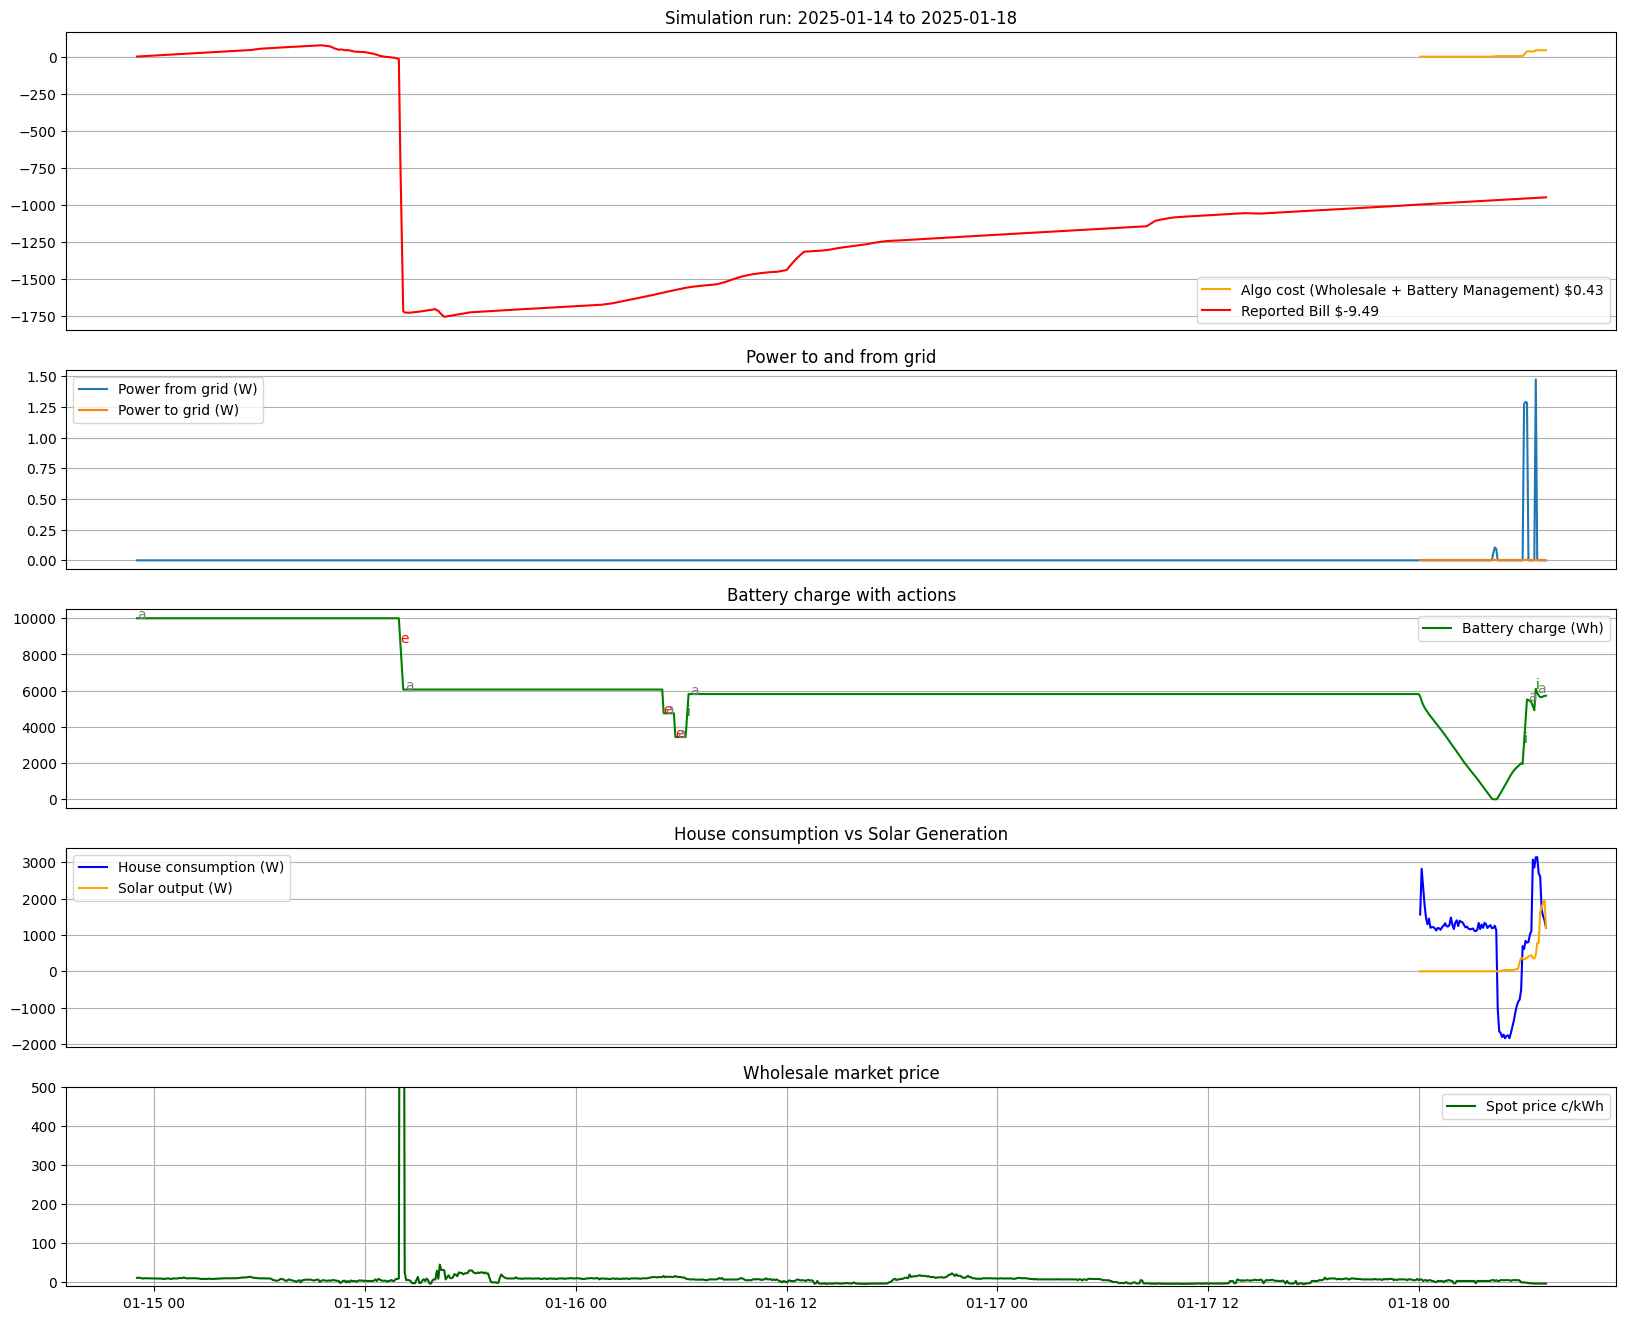

In [29]:
from astral import LocationInfo
from astral.sun import sun

filename = "nsw_script.py"
try:
    with open(filename, "r") as file:
        content = file.read()
except FileNotFoundError:
    print(f"R001 File {filename} not found")

def always_auto(inverter_time, **kwargs):
    return 'auto', 'always_auto'
    
battery_capacity = installed_battery
charge_rate = inverter_power
max_ppv_power = installed_solar
meter_data_df['forecast'] = meter_data_df['forecasts']
sim = InverterSimulator(meter_data_df.copy(), always_auto, battery_capacity=battery_capacity,
                        spot_to_tariff=spot_to_tariff, tariff=tariff, network=network,
                        charge_rate=charge_rate, max_ppv_power=max_ppv_power)
auto_bill, ret_df = sim.run_simulation()

def run_user_code(interval_time, **kwargs):
    params = {'interval_time': interval_time,
              'battery_capacity': battery_capacity,
              'charge_rate': charge_rate,
              'max_ppv_power': max_ppv_power,
              'action': 'auto',
              'reason': 'default: auto',
              'location': LocationInfo("Brisbane", "Australia", timezone, latitude, longitude)}
    for key, val in kwargs.items():
        params[key] = val
    with open(filename, "r") as file:
        content = file.read()
        code = compile(content, filename, 'exec')
        eval(code, globals(), params)
    return params['action'], params['reason']

sim = InverterSimulator(meter_data_df.copy(), run_user_code, battery_capacity=battery_capacity,
                        spot_to_tariff=spot_to_tariff, tariff=tariff, network=network,
                        charge_rate=charge_rate, max_ppv_power=max_ppv_power)
sim_bill, ret_df = sim.run_simulation()

print('User code', round(sim_bill/100, 2), 'v auto only', round(auto_bill/100, 2))
plot()